# Imports

In [80]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import pandas as pd
from sklearn.datasets import load_boston
# %matplotlib inlinev

from pandas_profiling import ProfileReport
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Load Data

In [51]:
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target

In [52]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

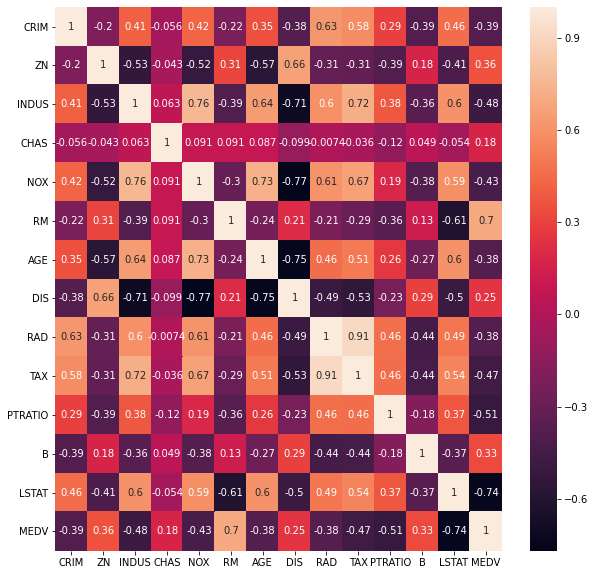

In [58]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),
            cbar=True,
            annot=True)

/Users/user/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,506
Total Missing (%),0.0%
Total size in memory,55.5 KiB
Average record size in memory,112.3 B
Numeric,12
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1

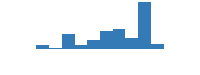

In [59]:
profile = ProfileReport(df)
profile

# Feature transform.

In [60]:
df = df.drop(['DIS'], axis=1)
df = df.drop(['CHAS'], axis=1)
df = df.drop(['ZN'], axis=1)
df = df.drop(['AGE'], axis=1)
df = df.drop(['B'], axis=1)
df

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,1.0,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,2.0,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,2.0,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,3.0,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,1.0,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,1.0,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,1.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,1.0,273.0,21.0,6.48,22.0


In [61]:
df.describe(include='all')

,CRIM,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,24.000000,711.000000,22.000000,37.970000,50.000000


In [62]:
df.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [65]:
df['RM'] = df['RM'].apply(math.ceil).astype(int)

In [66]:
# del outliers
df = df[df["INDUS"] <= 19]
df = df[df["MEDV"] <= 49]
df = df[df['TAX'] < 666]

In [67]:
# transform lstat
df['LSTAT'] = (1/df['LSTAT']).apply(math.sqrt)

# Modeling

In [68]:
from sklearn.model_selection import train_test_split
y = df['MEDV']
X = df[df.columns.difference(['MEDV'])] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## LinearRegression

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [96]:
lr_params = {'fit_intercept': ['True', 'False']}

In [97]:
grid_lr = GridSearchCV(lr, lr_params,scoring='r2', cv = 10)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False']}, scoring='r2')

In [98]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

{'fit_intercept': 'True'}
0.6997846065246428
LinearRegression(fit_intercept='True')


## Lasso Regression

In [73]:
from sklearn.linear_model import Lasso
l = Lasso()

In [90]:
l_params = {'alpha': 10.**np.arange(-6,6)}

In [91]:
grid_l = GridSearchCV(l, l_params, scoring='r2', cv = 10)
grid_l.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05])},
             scoring='r2')

In [92]:
print(grid_l.best_params_)
print(grid_l.best_score_)
print(grid_l.best_estimator_)

{'alpha': 0.001}
0.7000138597942163
Lasso(alpha=0.001)


## Ridge

In [75]:
from sklearn.linear_model import Ridge
r = Ridge()

In [93]:
r_params = {'alpha': 10.**np.arange(-6,6)}

In [94]:
grid_r = GridSearchCV(r, r_params, scoring='r2', cv = 10)
grid_r.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05])},
             scoring='r2')

In [95]:
print(grid_r.best_params_)
print(grid_r.best_score_)
print(grid_r.best_estimator_)

{'alpha': 0.01}
0.6999843225887953
Ridge(alpha=0.01)
